### 一.基础属性
**基本定义**：节点、边   
**基本类型**：有向图、无向图；加权图，非加权图；连通图，非连通图；连通分量，强连通分量，弱连通分量；二部图   
**邻居，$k$阶邻居，度**  
**子图、$k$阶子图、路径、图直径**  
**表示方式**: 邻接矩阵，关联矩阵  
**遍历方式**：深度优先，广度优先   

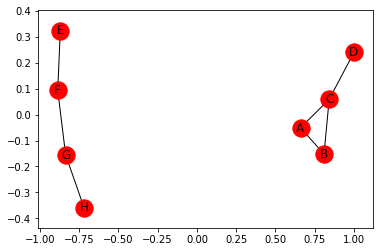

In [1]:
#构建图
%matplotlib inline
from matplotlib import pyplot as plt
import networkx as nx
G=nx.Graph()#无向图，有向图用DiGraph
G.add_nodes_from(["A","B","C","D","E","F","G","H"])
G.add_edges_from([("A","B"),("A","C"),("B","C"),("C","D"),("E","F"),("F","G"),("G","H")])
nx.draw_networkx(G)
plt.show()

In [2]:
#度
nx.degree(G)

DegreeView({'A': 2, 'B': 2, 'C': 3, 'D': 1, 'E': 1, 'F': 2, 'G': 2, 'H': 1})

In [3]:
#连通分量
list(nx.connected_components(G))

[{'A', 'B', 'C', 'D'}, {'E', 'F', 'G', 'H'}]

In [4]:
#图直径:所有两两节点直接最短路径的最大值
subG=nx.subgraph(G,["A","B","C","D"])
nx.diameter(subG)

2

In [5]:
#路径长度
nx.shortest_path_length(G,source="A",target="D")

2

### 二.中心性指标
中心性指标主要用于衡量节点在图中的重要性/影响力，我们对节点重要性的解释有很多，不同的解释下判定中心性的指标也有所不同，通常有这些：点度中心性，中介中心性，接近中心性，特征向量中心性，PageRank，hits

In [6]:
#点度中心性
#节点的邻居越多，它就越重要，定义为：度/(节点数-1)
nx.degree_centrality(G)

{'A': 0.2857142857142857,
 'B': 0.2857142857142857,
 'C': 0.42857142857142855,
 'D': 0.14285714285714285,
 'E': 0.14285714285714285,
 'F': 0.2857142857142857,
 'G': 0.2857142857142857,
 'H': 0.14285714285714285}

In [7]:
#中介中心性
#如果该节点出现该其它两两节点路径上的次数越多，它就越重要
nx.betweenness_centrality(G)

{'A': 0.0,
 'B': 0.0,
 'C': 0.09523809523809523,
 'D': 0.0,
 'E': 0.0,
 'F': 0.09523809523809523,
 'G': 0.09523809523809523,
 'H': 0.0}

In [8]:
#接近中心性
#如果该节点与其它节点之间的距离越近，它就越重要
nx.closeness_centrality(G)

{'A': 0.3214285714285714,
 'B': 0.3214285714285714,
 'C': 0.42857142857142855,
 'D': 0.2571428571428571,
 'E': 0.21428571428571427,
 'F': 0.3214285714285714,
 'G': 0.3214285714285714,
 'H': 0.21428571428571427}

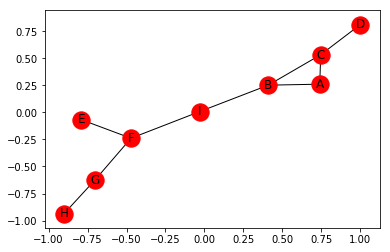

In [9]:
#特征向量中心性
#定义：取邻接矩阵特征分解后，最大特征值对应的特征向量
#与某节点连接的节点的邻居越多，就越重要
#新增加一个节点I来连接两块连通分量
G=nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F","G","H","I"])
G.add_edges_from([("A","B"),("A","C"),("B","C"),("C","D"),("E","F"),("F","G"),("G","H"),("I","B"),("I","F")])
nx.draw_networkx(G)
plt.show()

In [10]:
nx.eigenvector_centrality(G)

{'A': 0.44885390912200857,
 'B': 0.5468450989996043,
 'C': 0.5135021004101872,
 'D': 0.21736961615213216,
 'E': 0.09799461776528895,
 'F': 0.2314938976977582,
 'G': 0.11938887762076224,
 'H': 0.0505393145300136,
 'I': 0.3294789107351654}

In [11]:
#pagerank
nx.pagerank(G)

{'A': 0.10252135128679807,
 'B': 0.14929077894067944,
 'C': 0.153726203840718,
 'D': 0.06022249294537078,
 'E': 0.06475108608528522,
 'F': 0.16971188372812845,
 'G': 0.1235500933464885,
 'H': 0.06917616539981883,
 'I': 0.1070499444267125}

In [12]:
#hits
nx.hits(G)

({'A': 0.17564701604305502,
  'B': 0.21399245433642766,
  'C': 0.2009454874842481,
  'D': 0.08506205753671801,
  'E': 0.03834543957793587,
  'F': 0.09058495722206274,
  'G': 0.04671661924357704,
  'H': 0.019775570471702603,
  'I': 0.1289303980842729},
 {'A': 0.1756470158158291,
  'B': 0.21399245588711766,
  'C': 0.2009454869245228,
  'D': 0.085062057946483,
  'E': 0.03834543855419052,
  'F': 0.09058495938682286,
  'G': 0.04671661787549817,
  'H': 0.01977557118599924,
  'I': 0.1289303964235366})